## Final Project

ISM6644 – Python Fundamentals for Business Analytics
Dr. Tala Mirzaei

Tanairis Janes 
Yukti Kamthan 
Rithanya Sekar 
Theodore Atis

In [2]:
import pandas as pd

import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('Consumer_Data_Final Project.csv')

df.head()

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,Unnamed: 9,Unnamed: 10
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0,NaN,NaN
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0,NaN,NaN
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0,NaN,NaN
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0,NaN,NaN
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0,NaN,NaN


### Data Cleaning and Preparation

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Service                    0
Age                        0
CustomerSince              0
Customer Gender            0
Region                     0
SupportCallsLastYear       0
AverageBill                3
ChurnIndicator             0
Satisfaction Score         2
Unnamed: 9              9993
Unnamed: 10             9993
dtype: int64


In [5]:
# Replace missing value by average of the column

mean=df['AverageBill'].mean()

df.fillna({'AverageBill': mean}, inplace=True)


In [6]:
# Replace missing value by average of the column

mean1=df['Satisfaction Score'].mean()

df.fillna({'Satisfaction Score': mean1}, inplace=True)

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Service                    0
Age                        0
CustomerSince              0
Customer Gender            0
Region                     0
SupportCallsLastYear       0
AverageBill                0
ChurnIndicator             0
Satisfaction Score         0
Unnamed: 9              9993
Unnamed: 10             9993
dtype: int64


In [8]:
#Remove empty columns

df_cleaned = df.dropna(axis=1, how='all')

df_cleaned.head()

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0


In [9]:
# Cleaning Inconsistent Formats

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Customer Gender       9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9993 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction Score    9993 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [10]:
# Cleaning Inconsistent Formats

df_cleaned['CustomerSince'] = pd.to_datetime(df['CustomerSince'])

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Service               9993 non-null   object        
 1   Age                   9993 non-null   int64         
 2   CustomerSince         9993 non-null   datetime64[ns]
 3   Customer Gender       9993 non-null   object        
 4   Region                9993 non-null   object        
 5   SupportCallsLastYear  9993 non-null   int64         
 6   AverageBill           9993 non-null   float64       
 7   ChurnIndicator        9993 non-null   float64       
 8   Satisfaction Score    9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 702.8+ KB


/var/folders/8c/941r_n_s2fbc454lbfjb5fxh0000gn/T/ipykernel_2628/1070136147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerSince'] = pd.to_datetime(df['CustomerSince'])


In [11]:
#Detecting Outliers Using Z-Score for Churn Indicator
import numpy as np

# Calculate Z-scores for Churn Indicator
df_cleaned['z_scoreCI'] = (df_cleaned['ChurnIndicator'] - df_cleaned['ChurnIndicator'].mean()) / df_cleaned['ChurnIndicator'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierCI'] = df_cleaned['z_scoreCI'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
df_cleaned

/var/folders/8c/941r_n_s2fbc454lbfjb5fxh0000gn/T/ipykernel_2628/3282916616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['z_scoreCI'] = (df_cleaned['ChurnIndicator'] - df_cleaned['ChurnIndicator'].mean()) / df_cleaned['ChurnIndicator'].std()


,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,1.679604,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,-0.271732,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.271732,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,1.094203,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,0.183580,False
...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,-0.401821,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-0.401821,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.401821,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.401821,False


In [12]:
# Detecting Outliers with Value Count Method

df_cleaned['is_outlierCI'].value_counts()

is_outlierCI
False    9616
True      377
Name: count, dtype: int64

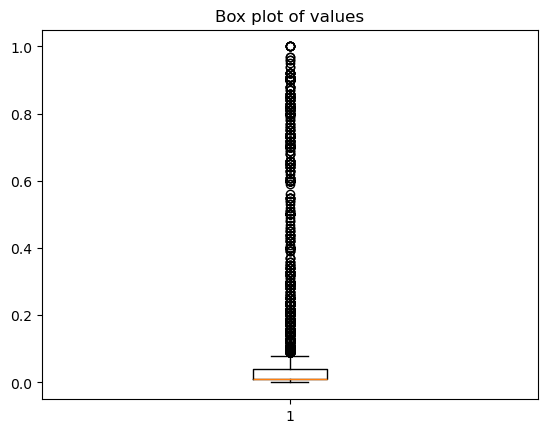

In [13]:
import matplotlib.pyplot as plt

# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['ChurnIndicator'])
plt.title('Box plot of values')
plt.show()

In [14]:
# Calculate Z-scores for Satisfaction Score
df_cleaned['z_scoreSS'] = (df_cleaned['Satisfaction Score'] - df_cleaned['Satisfaction Score'].mean()) / df_cleaned['Satisfaction Score'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierSS'] = df_cleaned['z_scoreSS'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
df_cleaned

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI,z_scoreSS,is_outlierSS
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,1.679604,False,-0.359588,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,-0.271732,False,-1.334658,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.271732,False,-0.847123,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,1.094203,False,-0.359588,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,0.183580,False,-0.359588,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,-0.401821,False,-0.847123,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-0.401821,False,0.615482,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.401821,False,-0.359588,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.401821,False,0.615482,False


In [15]:
df_cleaned['is_outlierSS'].value_counts()

is_outlierSS
False    9993
Name: count, dtype: int64

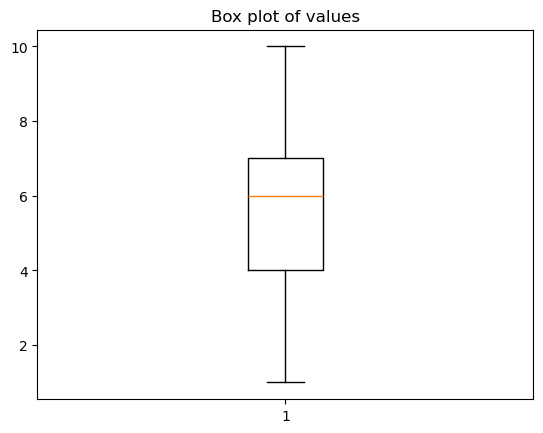

In [16]:
# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['Satisfaction Score'])
plt.title('Box plot of values')
plt.show()

In [17]:
# Calculate Z-scores for Average Bill
df_cleaned['z_scoreAB'] = (df_cleaned['AverageBill'] - df_cleaned['AverageBill'].mean()) / df_cleaned['AverageBill'].std()

# Set a threshold for the Z-score
threshold = 3

# Detect outliers
df_cleaned['is_outlierAB'] = df_cleaned['z_scoreAB'].apply(lambda x: abs(x) > threshold)

# Display the dataset with outliers marked
df_cleaned

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI,z_scoreSS,is_outlierSS,z_scoreAB,is_outlierAB
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,1.679604,False,-0.359588,False,-0.442123,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,-0.271732,False,-1.334658,False,-0.989247,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.271732,False,-0.847123,False,-1.578457,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,1.094203,False,-0.359588,False,-0.063345,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,0.183580,False,-0.359588,False,-1.325938,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,-0.401821,False,-0.847123,False,-1.368025,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-0.401821,False,0.615482,False,0.610039,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.401821,False,-0.359588,False,-0.905074,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.401821,False,0.615482,False,-0.189604,False


In [18]:
# Detecting Outliers with Value Count Method

df_cleaned['is_outlierAB'].value_counts()


is_outlierAB
False    9993
Name: count, dtype: int64

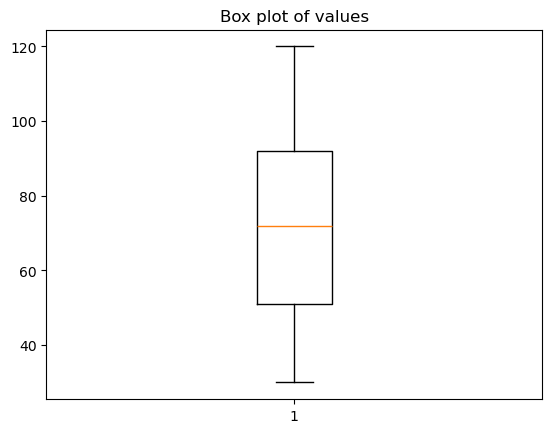

In [19]:
import matplotlib.pyplot as plt

# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['AverageBill'])
plt.title('Box plot of values')
plt.show()

In [20]:
# Detecting Outliers Using Interquartile Range (IQR)

Q1 = df_cleaned['ChurnIndicator'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_cleaned['ChurnIndicator'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Set thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
df_cleaned['is_outlier_CI_iqr'] = df['ChurnIndicator'].apply(lambda x: x < lower_bound or x > upper_bound)

# Display the dataset with outliers marked using IQR
df_cleaned


,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI,z_scoreSS,is_outlierSS,z_scoreAB,is_outlierAB,is_outlier_CI_iqr
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,1.679604,False,-0.359588,False,-0.442123,False,True
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,-0.271732,False,-1.334658,False,-0.989247,False,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.271732,False,-0.847123,False,-1.578457,False,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,1.094203,False,-0.359588,False,-0.063345,False,True
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,0.183580,False,-0.359588,False,-1.325938,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,-0.401821,False,-0.847123,False,-1.368025,False,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-0.401821,False,0.615482,False,0.610039,False,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.401821,False,-0.359588,False,-0.905074,False,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.401821,False,0.615482,False,-0.189604,False,False


In [21]:
# Handling Outliers by Replacing Them with the Median

median_value = df_cleaned['ChurnIndicator'].median()

print(median_value)

df_cleaned['ChurnIndicator'] = np.where(df_cleaned['is_outlier_CI_iqr'], median_value, df_cleaned['ChurnIndicator'])

df_cleaned

0.01


,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI,z_scoreSS,is_outlierSS,z_scoreAB,is_outlierAB,is_outlier_CI_iqr
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.01,5.0,1.679604,False,-0.359588,False,-0.442123,False,True
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,-0.271732,False,-1.334658,False,-0.989247,False,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.271732,False,-0.847123,False,-1.578457,False,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.01,5.0,1.094203,False,-0.359588,False,-0.063345,False,True
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.01,5.0,0.183580,False,-0.359588,False,-1.325938,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,-0.401821,False,-0.847123,False,-1.368025,False,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-0.401821,False,0.615482,False,0.610039,False,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.401821,False,-0.359588,False,-0.905074,False,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.401821,False,0.615482,False,-0.189604,False,False


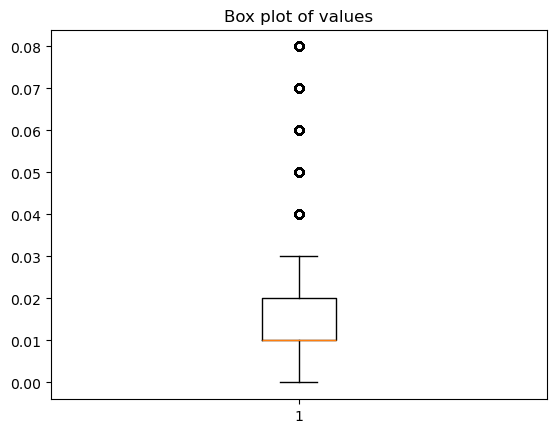

In [22]:
# Plot a boxplot to visualize the outliers
plt.boxplot(df_cleaned['ChurnIndicator'])
plt.title('Box plot of values')
plt.show()

## Exploratory Data Analysis

In [24]:
## Descriptive Statistics

df_cleaned[['Age','SupportCallsLastYear','AverageBill','ChurnIndicator','Satisfaction Score']].describe()

,Age,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,47.956670,1.908436,71.505105,0.017151,5.737564
std,16.963456,2.525554,23.760614,0.017957,2.051135
min,18.000000,0.000000,30.000000,0.000000,1.000000
25%,34.000000,0.000000,51.000000,0.010000,4.000000
50%,47.000000,1.000000,72.000000,0.010000,6.000000
75%,62.000000,3.000000,92.000000,0.020000,7.000000
max,80.000000,10.000000,120.000000,0.080000,10.000000


In [25]:
## Identify duplicates

df_duplicated = df_cleaned[df.duplicated(keep=False)]

df_duplicated


,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,z_scoreCI,is_outlierCI,z_scoreSS,is_outlierSS,z_scoreAB,is_outlierAB,is_outlier_CI_iqr
50,landline,45,2010-07-03 10:27:00,F,Central,0,99.0,0.02,6.0,-0.271732,False,0.127947,False,1.157163,False,False
51,landline,45,2010-07-03 10:27:00,F,Central,0,99.0,0.02,6.0,-0.271732,False,0.127947,False,1.157163,False,False
69,phone,26,2010-07-07 10:27:00,M,North,1,52.0,0.03,4.0,-0.206687,False,-0.847123,False,-0.820901,False,False
70,phone,26,2010-07-07 10:27:00,M,North,1,52.0,0.03,4.0,-0.206687,False,-0.847123,False,-0.820901,False,False
104,4G,64,2010-07-15 10:27:00,M,Central,0,111.0,0.01,7.0,0.248625,False,0.615482,False,1.662200,False,True
105,4G,64,2010-07-15 10:27:00,M,Central,0,111.0,0.01,7.0,0.248625,False,0.615482,False,1.662200,False,True


In [26]:
# Drop duplicates
df_cleaned.drop_duplicates(inplace=True)

df_cleaned.duplicated().sum()

0

## Data Visualization

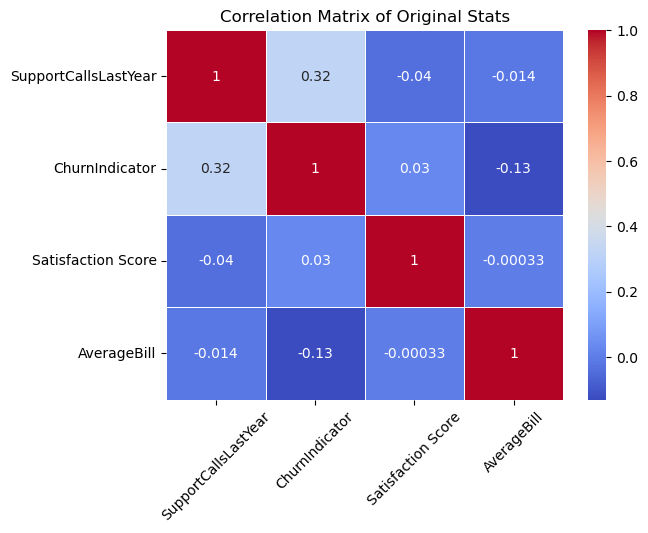

In [28]:
## Detecting Trends

import seaborn as sns

plt.figure()
corr = df_cleaned[['SupportCallsLastYear','ChurnIndicator','Satisfaction Score','AverageBill']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Correlation Matrix of Original Stats")
plt.show()

In [29]:
# Standardize the Churn Indicator and Support Calls Last Year columns

df_standardized = df_cleaned[['ChurnIndicator', 'SupportCallsLastYear']] = (df[['ChurnIndicator', 'SupportCallsLastYear']] - df[['ChurnIndicator', 'SupportCallsLastYear']].mean())/df[['ChurnIndicator', 'SupportCallsLastYear']].std()

df_standardized

,ChurnIndicator,SupportCallsLastYear
0,1.679604,0.036255
1,-0.271732,-0.755650
2,-0.271732,-0.755650
3,1.094203,1.224113
4,0.183580,1.224113
...,...,...
9988,-0.401821,-0.359698
9989,-0.401821,-0.755650
9990,-0.401821,1.620066
9991,-0.401821,-0.359698


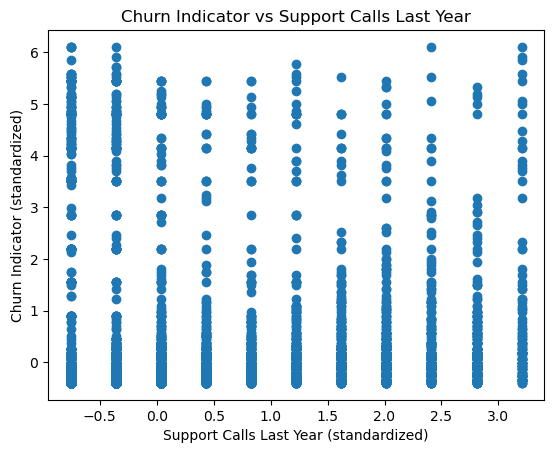

In [30]:
## Scatter Plot of Standardized Data

import matplotlib.pyplot as plt

# Scatter plot of Churn Indicator vs Support Calls Last Year

plt.scatter(df_standardized['SupportCallsLastYear'], df_standardized['ChurnIndicator'])
plt.title('Churn Indicator vs Support Calls Last Year')
plt.xlabel('Support Calls Last Year (standardized)')
plt.ylabel('Churn Indicator (standardized)')
plt.show()

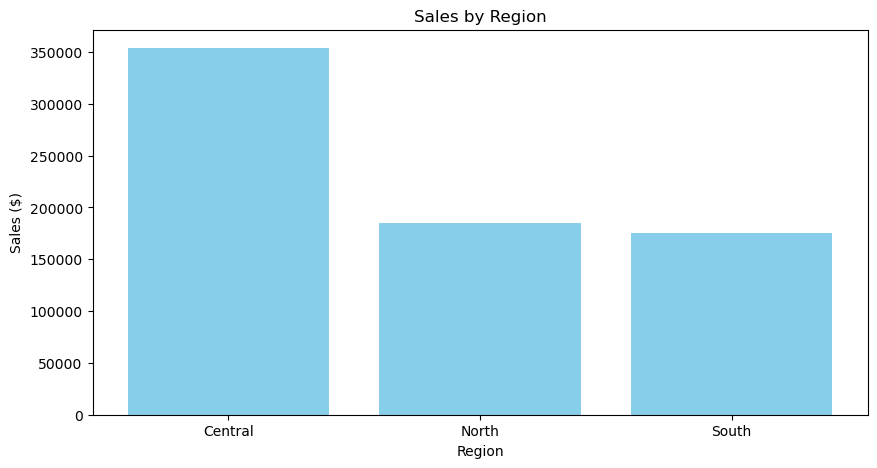

In [31]:
## Bar Chart of Sales by Region Analysis

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##We first group by Region and sum the AverageBill's value, ensuring the data is structured correctly.

region_sales = df_cleaned.groupby('Region')['AverageBill'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(region_sales['Region'], region_sales['AverageBill'], color='skyblue')

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.show()

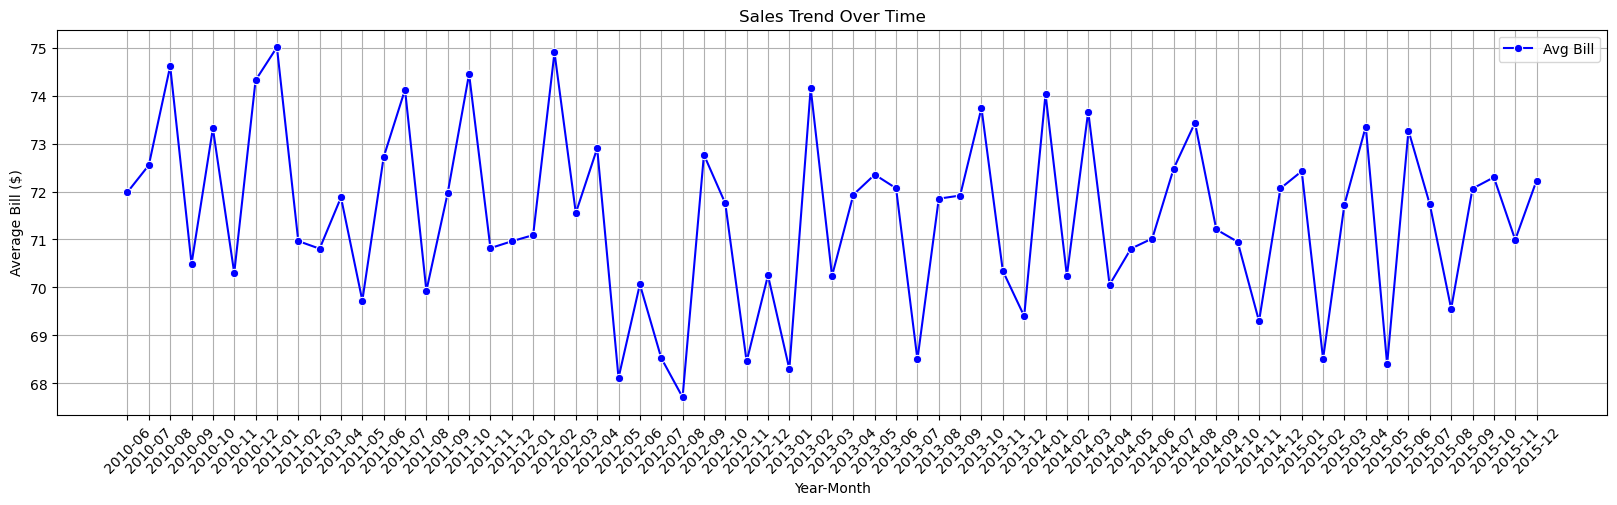

In [32]:
## Sales Trend Over Time via Line Plot Graph

df_cleaned['CustomerSince'] = pd.to_datetime(df_cleaned['CustomerSince'])

# Extract year and month
df_cleaned['YearMonth'] = df_cleaned['CustomerSince'].dt.to_period('M')

# Group by Year-Month and calculate the average bill
trend_data = df_cleaned.groupby('YearMonth')['AverageBill'].mean().reset_index()

# Convert YearMonth to string for plotting
trend_data['YearMonth'] = trend_data['YearMonth'].astype(str)

# Plot Sales Trend
plt.figure(figsize=(20, 5))
sns.lineplot(x='YearMonth', y='AverageBill', data=trend_data, marker='o', color='b', label="Avg Bill")
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Average Bill ($)")
plt.title("Sales Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()

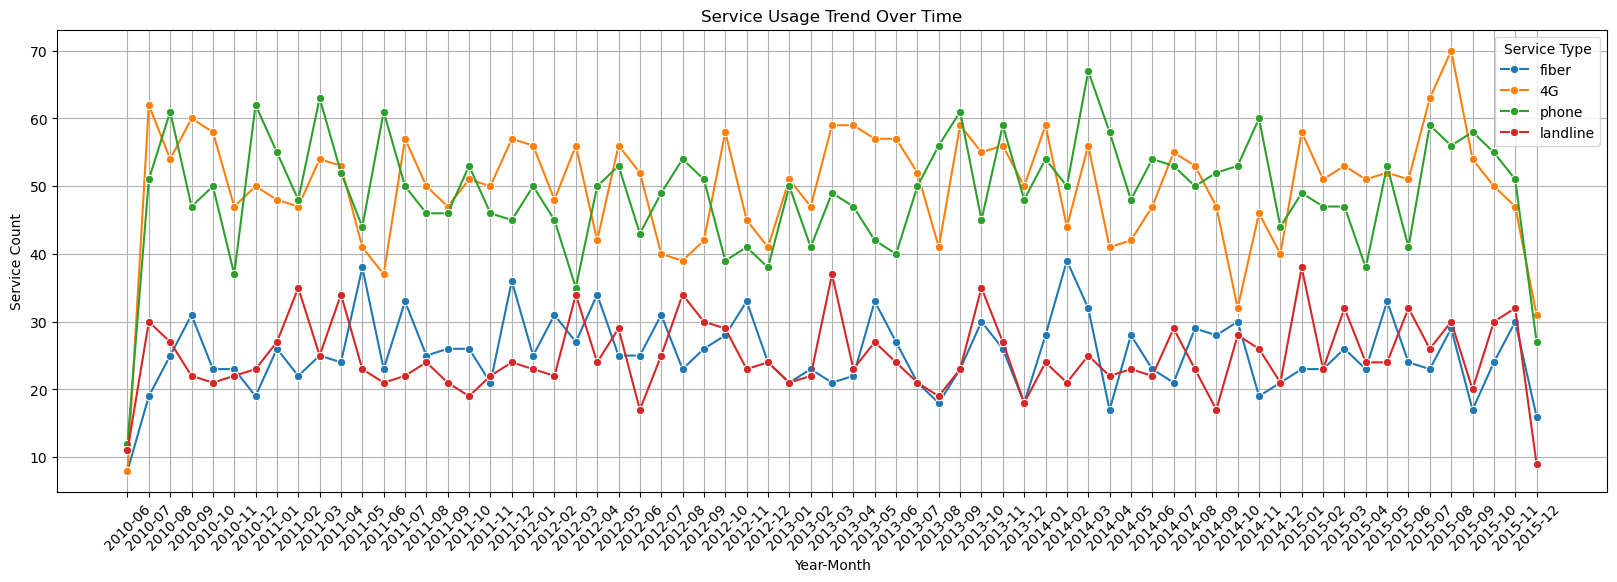

In [33]:
## Service Usage Trend Over Time via Line Plot Graph

df_cleaned['CustomerSince'] = pd.to_datetime(df_cleaned['CustomerSince'])

# Extract year and month
df_cleaned['YearMonth'] = df_cleaned['CustomerSince'].dt.to_period('M')

all_months = df_cleaned['YearMonth'].unique()
all_services = df_cleaned['Service'].unique()

# Create a full combination of Year-Month and Service
full_index = pd.MultiIndex.from_product([all_months, all_services], names=["YearMonth", "Service"])

# Group and count service usage
trend_data = df_cleaned.groupby(['YearMonth', 'Service']).size().reset_index(name='Count')

# Reindex to include missing months and fill with 0
trend_data = trend_data.set_index(['YearMonth', 'Service']).reindex(full_index, fill_value=0).reset_index()

# Convert YearMonth to string for plotting
trend_data['YearMonth'] = trend_data['YearMonth'].astype(str)

# Plot service trends over time
plt.figure(figsize=(20, 6))
sns.lineplot(x='YearMonth', y='Count', hue='Service', data=trend_data, marker='o')

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Service Count")
plt.title("Service Usage Trend Over Time")
plt.legend(title="Service Type")
plt.grid(True)
plt.show()

/var/folders/8c/941r_n_s2fbc454lbfjb5fxh0000gn/T/ipykernel_2628/2319462202.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df_cleaned.groupby('AgeGroup')['AverageBill'].count().reset_index()


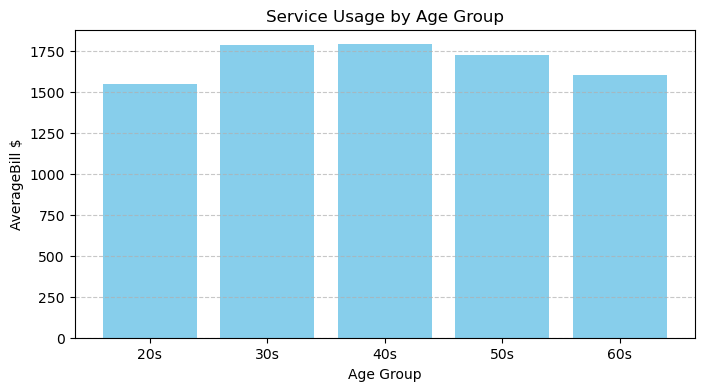

In [34]:
## Service Usage by Age Group

bins = [20, 30, 40, 50, 60,70]
labels = ["20s", "30s", "40s", "50s","60s",]
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

age_group_sales = df_cleaned.groupby('AgeGroup')['AverageBill'].count().reset_index()

plt.figure(figsize=(8,4))
plt.bar(age_group_sales['AgeGroup'], age_group_sales['AverageBill'], color='skyblue')
plt.title('Service Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('AverageBill $')
plt.grid(axis='y', linestyle='--', alpha=0.7)

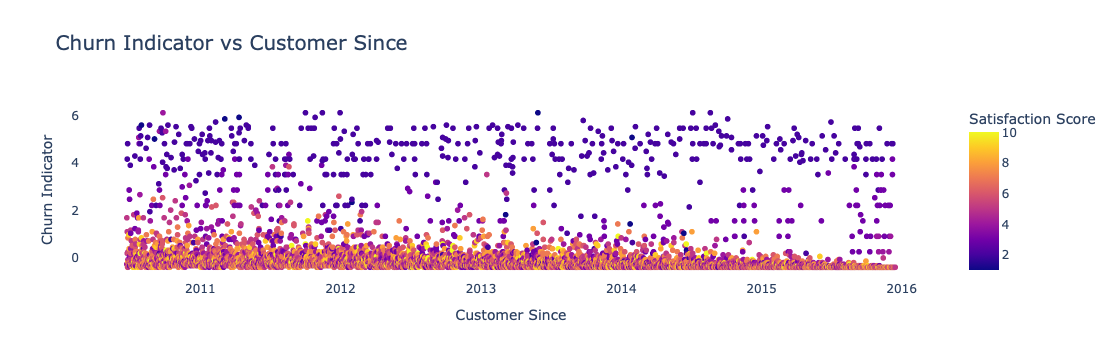

In [80]:


import plotly.express as px

fig = px.scatter(df_cleaned, 
                 x='CustomerSince', 
                 y='ChurnIndicator', 
                 color='Satisfaction Score',
                 title='Churn Indicator vs Customer Since',
                 labels={'CustomerSince': 'Customer Since', 'ChurnIndicator': 'Churn Indicator'},
                 hover_data=['CustomerSince'])

fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title_text='Species',
)

fig.show()

/var/folders/8c/941r_n_s2fbc454lbfjb5fxh0000gn/T/ipykernel_2628/2673473961.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




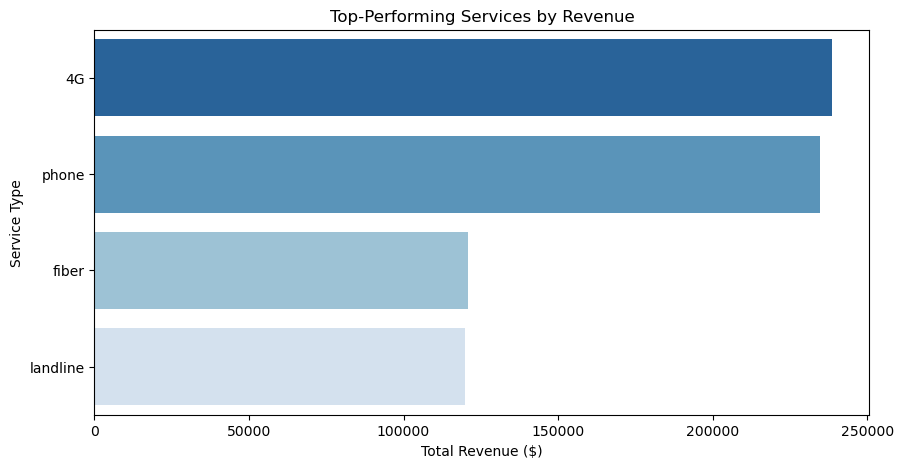

In [36]:
##Identifying Top-Performing Products & Regions

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue by service
top_services = df_cleaned.groupby('Service')['AverageBill'].sum().reset_index()
top_services = top_services.sort_values(by='AverageBill', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='AverageBill', y='Service', data=top_services, palette='Blues_r')
plt.xlabel("Total Revenue ($)")
plt.ylabel("Service Type")
plt.title("Top-Performing Services by Revenue")
plt.show()

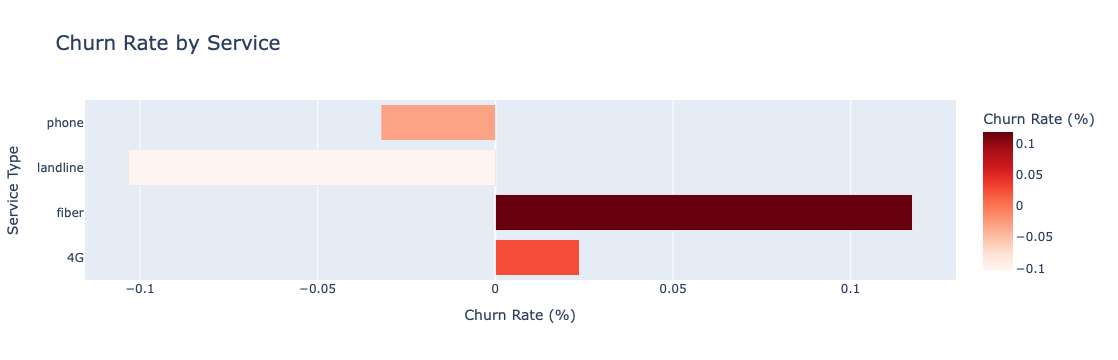

In [82]:
import plotly.express as px

# Calculate churn rate by service
churn_by_service = df_cleaned.groupby('Service')['ChurnIndicator'].mean().reset_index()

# Create interactive bar chart
fig = px.bar(churn_by_service, 
             x='ChurnIndicator', 
             y='Service', 
             orientation='h', 
             color='ChurnIndicator',
             color_continuous_scale='Reds',
             title='Churn Rate by Service',
             labels={'ChurnIndicator': 'Churn Rate (%)', 'Service': 'Service Type'})

fig.update_layout(title_font_size=20, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

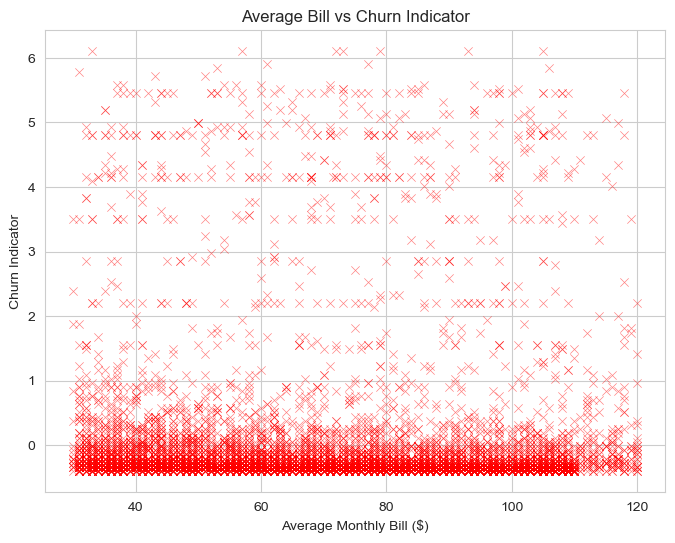

In [38]:
## Churn vs Average Bill

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AverageBill', y='ChurnIndicator', data=df_cleaned, alpha=0.5, color="red",marker='x')

# Set title and labels
plt.title("Average Bill vs Churn Indicator")
plt.xlabel("Average Monthly Bill ($)")
plt.ylabel("Churn Indicator")

# Show plot
plt.show()


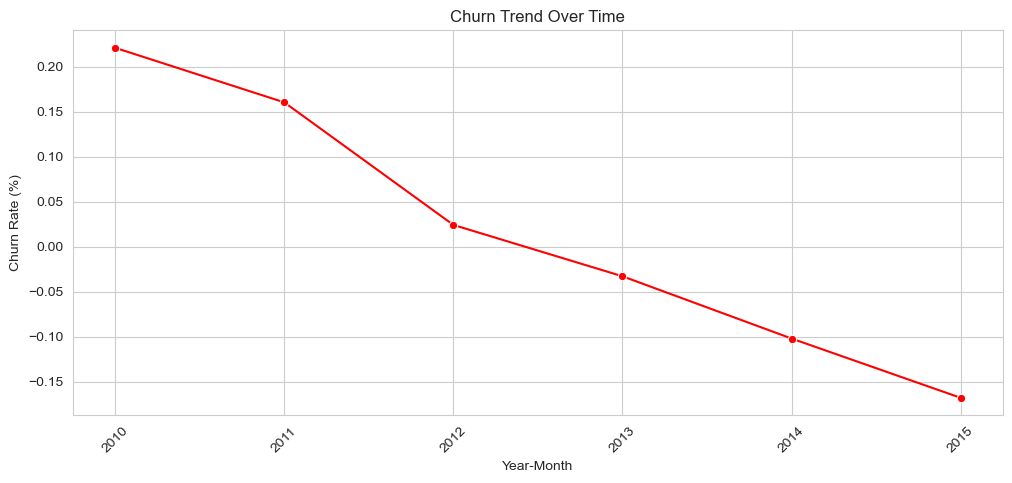

In [39]:
## Churn Trend Over Time

df_cleaned['CustomerSince'] = pd.to_datetime(df_cleaned['CustomerSince'])

# Extract Year-Month
df_cleaned['Year'] = df_cleaned['CustomerSince'].dt.year

# Churn over time
churn_trend = df_cleaned.groupby('Year')['ChurnIndicator'].mean().reset_index()
churn_trend['Year'] = churn_trend['Year'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='ChurnIndicator', data=churn_trend, marker='o', color='r')
plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Trend Over Time")
plt.grid(True)
plt.show()

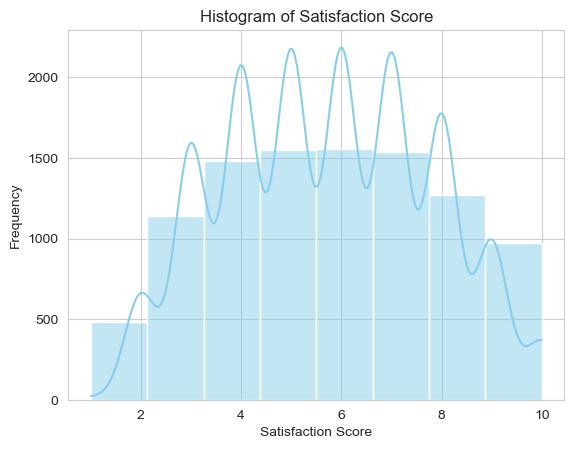

In [40]:
## Histogram: Distribution of Statisfaction Score
plt.figure()
sns.histplot(df_cleaned['Satisfaction Score'], bins=8, kde=True, color='skyblue')
plt.title("Histogram of Satisfaction Score")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

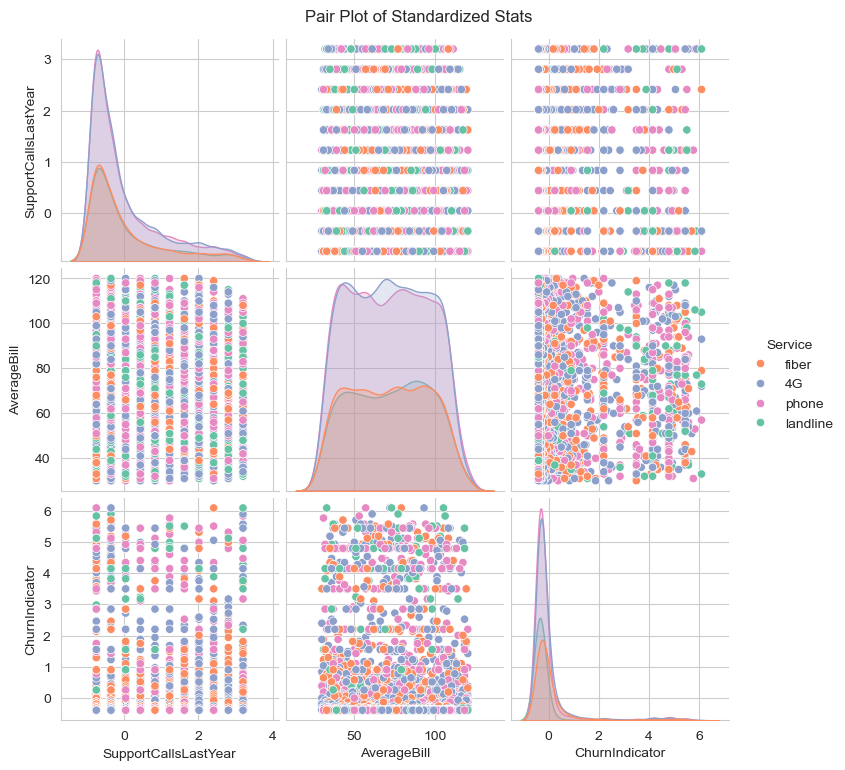

In [160]:
## Pair Plot: Relationships among all standardized stats

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Service' column exists and is a string
df_cleaned['Service'] = df_cleaned['Service'].astype(str)

# Define color mapping based on unique service types
palette = {'4G': "#8DA0CB", 'fiber': "#FC8D62", 'landline': "#66C2A5", 'phone': "#E78AC3"}



# Create pair plot
sns.pairplot(df_cleaned[['SupportCallsLastYear', 'AverageBill', 'ChurnIndicator', 'Service']], 
             hue='Service', 
             palette=palette)

# Add title
plt.suptitle("Pair Plot of Standardized Stats", y=1.02)

# Show plot
plt.show()